In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [6]:
# set train data path
path_train     = '/kaggle/input/phys591000-2022-final-project-ii/fc_train_data/fc_train_data'
df_train = pd.read_csv('/kaggle/input/phys591000-2022-final-project-ii/fc_train_data/fc_train_data/fc_training_list.csv')

label_train = np.array(df_train['label'])
id_train    = np.array(df_train['id'])

idname = id_train[0]

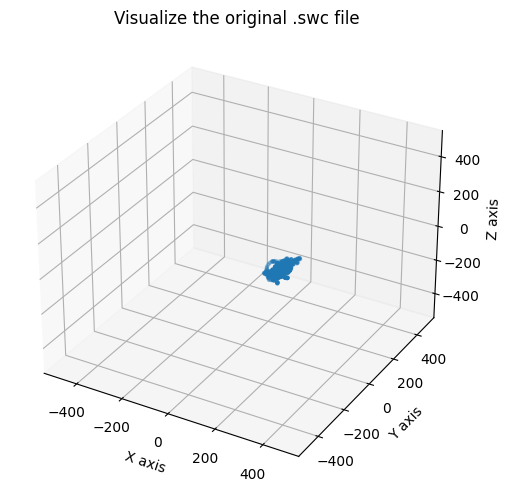

In [10]:
def plot_swc3d(x, y, z):
    # 建立 3D 圖形
    fig = plt.figure(figsize=(6,6), dpi=100)
    fig.patch.set_facecolor('white')
    ax = fig.add_subplot(1,1,1, projection='3d')

    # 繪製 3D 曲面圖形
    ax.scatter3D(x, y, z, marker='.')

    ax.set_title('Visualize the original .swc file')
    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_zlabel('Z axis')
    
    ax.set_xlim(-524,525)
    ax.set_ylim(-524,525)
    ax.set_zlim(-524,525)

    # 顯示圖形
    plt.show()
    
    return

swc_train = np.loadtxt(f"{path_train}/swc/{idname}.swc")

r = swc_train[:,1]
x = swc_train[:,2]
y = swc_train[:,3]
z = swc_train[:,4]

plot_swc3d(x,y,z)

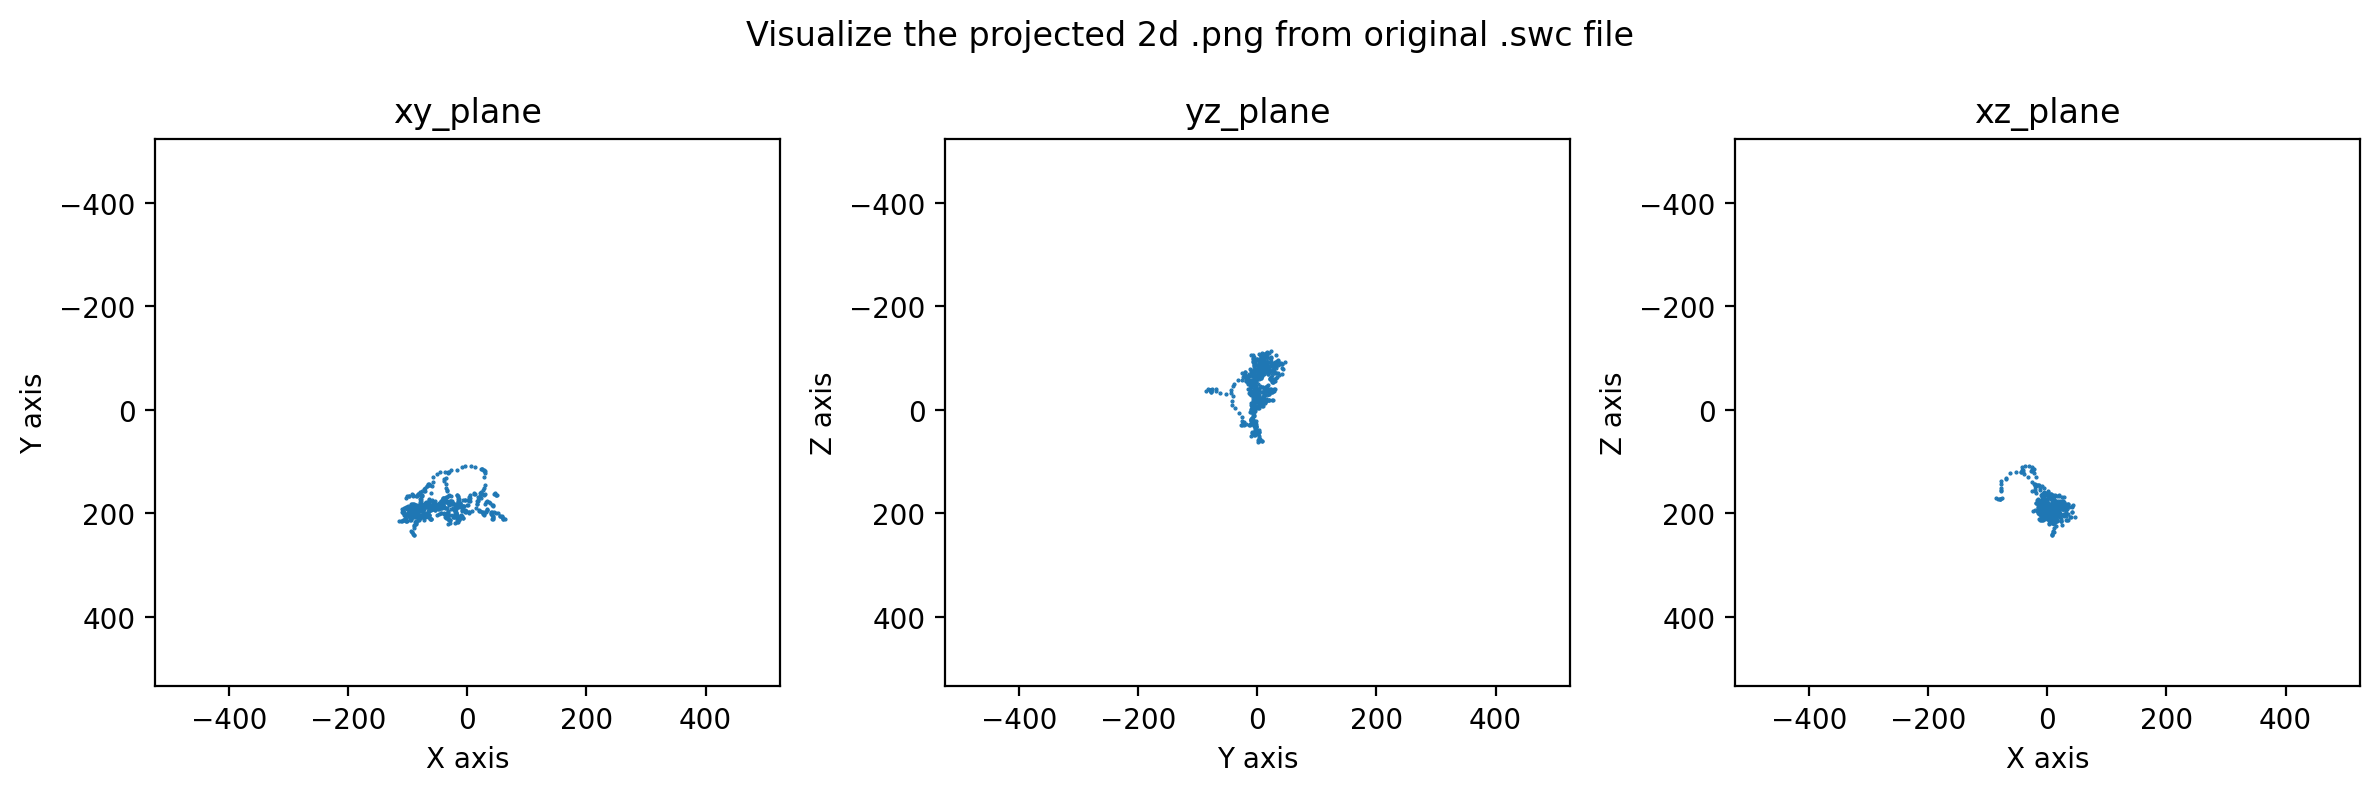

In [45]:
def plot_swc2d(x, y, z):
    # 建立 3D 圖形
    fig = plt.figure(figsize=(12,4), dpi=200)
    fig.patch.set_facecolor('white')
    fig.set_tight_layout(True)
    fig.suptitle('Visualize the projected 2d .png from original .swc file')
    
    ax = fig.add_subplot(1,3,1)
    ax.scatter(y, x, marker='.', s=1)
    ax.set_title('xy_plane')
    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis') 
    ax.set_xlim(-524,525)
    ax.set_ylim(535,-524)
    
    
    ax = fig.add_subplot(1,3,2)
    ax.scatter(z, y, marker='.', s=1)
    ax.set_title('yz_plane')
    ax.set_xlabel('Y axis')
    ax.set_ylabel('Z axis')
    ax.set_xlim(-524,525)
    ax.set_ylim(535,-524)
    
    
    ax = fig.add_subplot(1,3,3)
    ax.scatter(z, x, marker='.', s=1)
    ax.set_title('xz_plane')
    ax.set_xlabel('X axis')
    ax.set_ylabel('Z axis')
    ax.set_xlim(-524,525)
    ax.set_ylim(535,-524)

    # 顯示圖形
    plt.show()
    
    return

plot_swc2d(x,y,z)

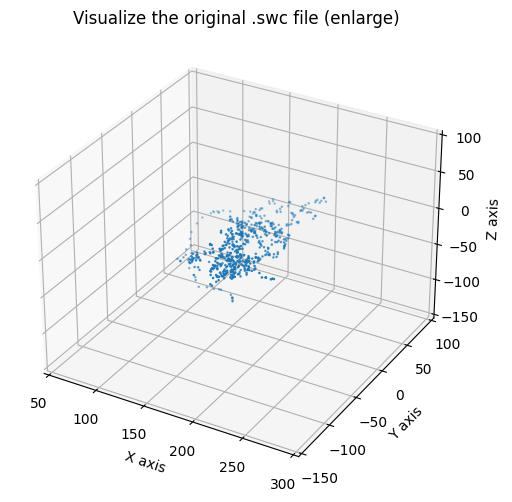

In [25]:
def plot_swc3d(x, y, z):
    # 建立 3D 圖形
    fig = plt.figure(figsize=(6,6), dpi=100)
    fig.patch.set_facecolor('white')
    ax = fig.add_subplot(1,1,1, projection='3d')

    # 繪製 3D 曲面圖形
    ax.scatter3D(x, y, z, marker='.', s=3)

    ax.set_title('Visualize the original .swc file (enlarge)')
    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_zlabel('Z axis')
    
    ax.set_xlim(50,300)
    ax.set_ylim(-150,100)
    ax.set_zlim(-150,100)

    # 顯示圖形
    plt.show()
    
    return

swc_train = np.loadtxt(f"{path_train}/swc/{idname}.swc")

r = swc_train[:,1]
x = swc_train[:,2]
y = swc_train[:,3]
z = swc_train[:,4]

plot_swc3d(x,y,z)

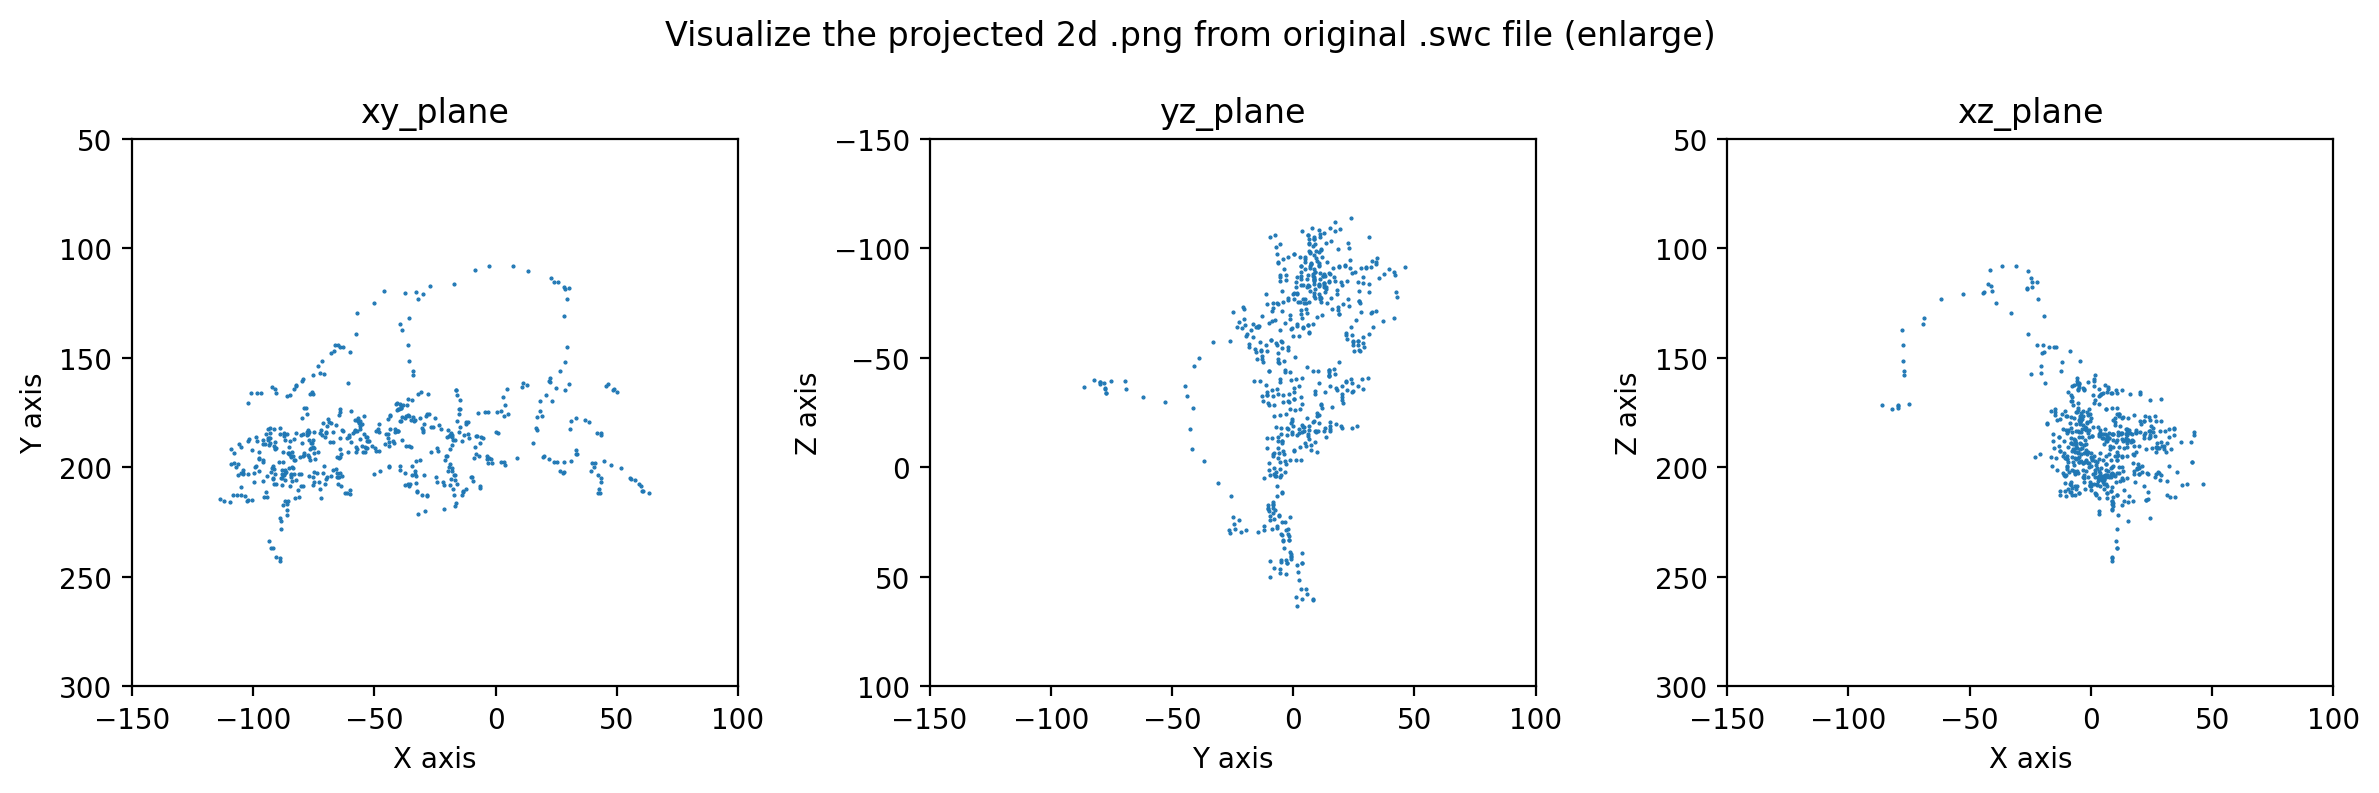

In [43]:
def plot_swc2d(x, y, z):
    # 建立 3D 圖形
    fig = plt.figure(figsize=(12,4), dpi=200)
    fig.patch.set_facecolor('white')
    fig.set_tight_layout(True)
    fig.suptitle('Visualize the projected 2d .png from original .swc file (enlarge)')
    
    ax = fig.add_subplot(1,3,1)
    ax.scatter(y, x, marker='.', s=1)
    ax.set_title('xy_plane')
    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis') 
    ax.set_xlim(-150,100)
    ax.set_ylim(300,50)
    
    
    ax = fig.add_subplot(1,3,2)
    ax.scatter(z, y, marker='.', s=1)
    ax.set_title('yz_plane')
    ax.set_xlabel('Y axis')
    ax.set_ylabel('Z axis')
    ax.set_xlim(-150,100)
    ax.set_ylim(100,-150)
    
    
    ax = fig.add_subplot(1,3,3)
    ax.scatter(z, x, marker='.', s=1)
    ax.set_title('xz_plane')
    ax.set_xlabel('X axis')
    ax.set_ylabel('Z axis')
    ax.set_xlim(-150,100)
    ax.set_ylim(300,50)

    # 顯示圖形
    plt.show()
    
    return

plot_swc2d(x,y,z)

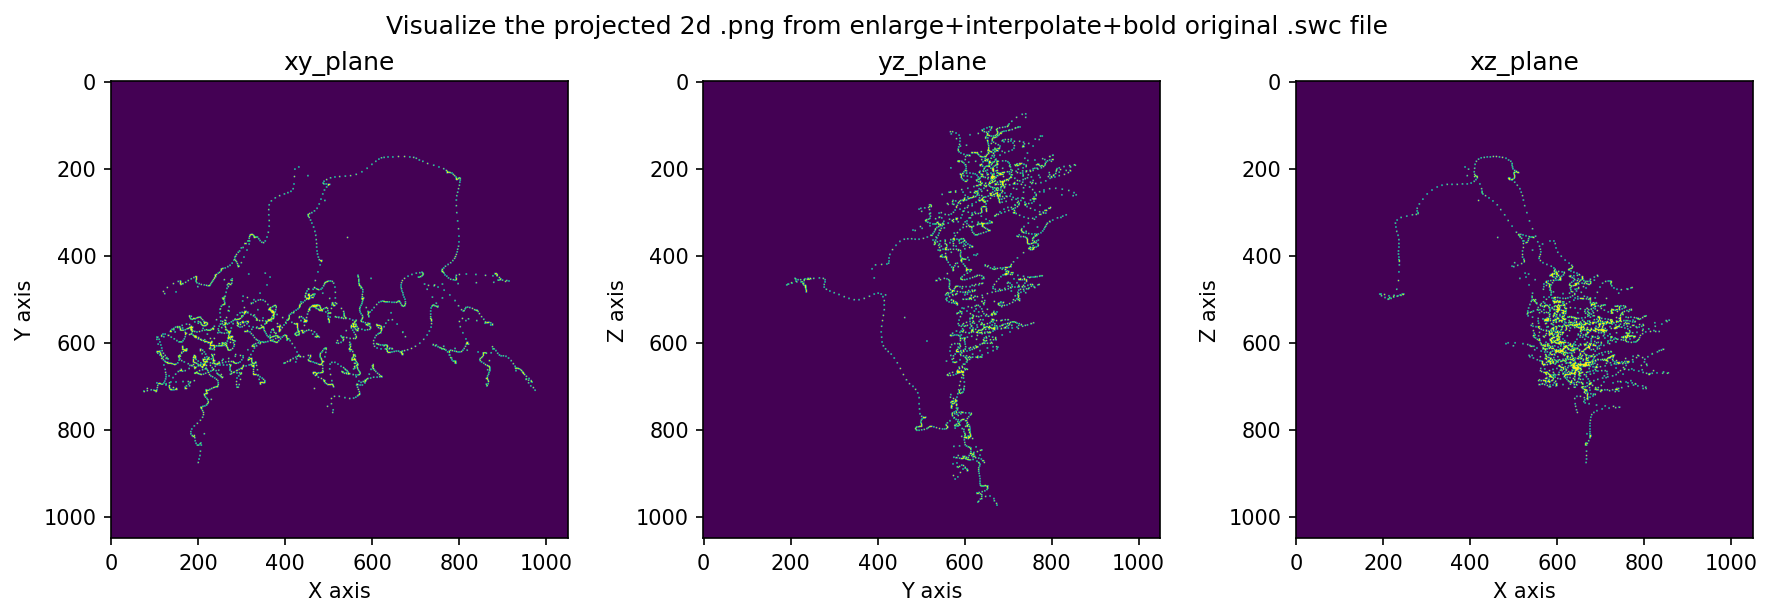

In [44]:
# Checking the projected plane image (with our code)
import matplotlib.pyplot as plt

idname = id_train[0]
savepath = f"/kaggle/input/3dto2d-preimage/train_3d/"

fig = plt.figure(figsize=(12,4), dpi=150)
fig.patch.set_facecolor('white')
fig.set_tight_layout(True)
fig.suptitle('Visualize the projected 2d .png from enlarge+interpolate+bold original .swc file')
    
ax = fig.add_subplot(1,3,1)
ax.set_title('xy_plane')
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis') 
plt.imshow(plt.imread(f"{savepath}/{idname}_xyplane.png"))

ax = fig.add_subplot(1,3,2)
ax.set_title('yz_plane')
ax.set_xlabel('Y axis')
ax.set_ylabel('Z axis') 
plt.imshow(plt.imread(f"{savepath}/{idname}_yzplane.png"))

ax = fig.add_subplot(1,3,3)
ax.set_title('xz_plane')
ax.set_xlabel('X axis')
ax.set_ylabel('Z axis') 
plt.imshow(plt.imread(f"{savepath}/{idname}_xzplane.png"))

plt.show()